# Trabalho de Multiplicação de Matrizes


---


### Universidade Federal da Paraíba | Programa de Pós-Graduação em Informática<br><br>
#### Disciplina: Estrutura de Dados e Complexidade de Algoritmos
#### Professor: Teobaldo Bulhões<br><br>

#### Mestranda: Ana Clara Chaves Sousa
#### Matrícula: 20211000294



---



# Descrição do Problema

Implementar e comparar dois algoritmos para o cálculo do
produto AB, sendo A e B duas matrizes quadradas de ordem n: <br>

1.   **Algoritmo “ingênuo”**, que consiste simplesmente em aplicar diretamente a definição do produto de matrizes;
2.   e o **algoritmo de Strassen**, descrito no capítulo 4 do livro-texto.

A comparação entre os dois algoritmos será na forma de um
gráfico relativo a diversas execuções com matrizes aleatórias de ordens variáveis. Deverão ser utilizados os seguintes parâmetros, os quais serão especificados através de um arquivo de texto:<br>

*   **kmax**:  expoente da potência de 2 correspondente ao máximo valor de n considerado, deve ser maior ou igual a 5;
*   **r**: número de matrizes geradas para cada valor de n;
*   **[amin, amax]**: intervalo ao qual os elementos das matrizes geradas devem pertencer. Todos os elementos devem ser números inteiros.

### Entrada

**Formato de entrada:** O formato esperado para o arquivo de entrada será ilustrado a partir do exemplo abaixo:

*   kmax = 10;  
*   r = 200;
*   [amin, amax] = [150, 250];

**Formato do arquivo:**<br>
10<br>
200<br>
150 250






### Saída

O programa deve gerar um gráfico que conterá uma curva para cada algoritmo.
No **eixo das abscissas**, tem-se a ordem das matrizes; no **eixo das ordenadas**, o tempo computacional médio do algoritmo correspondente. Os valores de ordem considerados serão os seguintes: 2^5, 2^6, ..., 2^kmax.

# Implementação

In [1]:
# Importação das bibliotecas
import random
import time
import pandas as pd

## Funções

### Gerando as matrizes

In [2]:
def gerar_matriz(n, a_min, a_max):
  """ Função para gerar as matrizes de ordem n, com elementos dentro do 
  intervalo de [a_min, a_max] """

  # Criando listas para armazenar os elementos da matriz
  elementos = []

  # Gerando elementos para a matriz
  for j in range(n): # Loop pelas colunas
    linha_matriz = [] # Criando lista para as linhas da matriz

    for i in range(n): # Loop pelas linhas
      linha_matriz.append(random.randint(a_min, a_max)) # Gerando cada linha

    # Juntando as linhas à lista completa de elementos
    elementos.append(linha_matriz)
  
  # Função retorna os elementos
  return elementos

### Multiplicação Ingênua

In [3]:
def multiplicar_naive(matriz_A, matriz_B):
  """ Multiplicação ingênua de duas matrizes A e B quadradas de ordem n """

  # Criando lista para a matriz resultado
  resultado = []

  # Loop nas linhas da matriz A
  for k in range(0, len(matriz_A)): 
      linhas = [] # Criando uma lista para as linhas

      for i in range(0, len(matriz_B[0])): # Loop nas colunas da matriz B
          colunas = 0 # Atribuindo o valor 0 para as colunas

          for j in range (0, len(matriz_B)): 
              colunas += matriz_A[k][j] * matriz_B[j][i] # Fazendo a multiplicação

          linhas.append(colunas) # Unindo as linhas e as colunas
      resultado.append(linhas) # Atribuindo ao resultado

  # Retorna o resultado da multiplicação    
  return resultado

### Algoritmo de Strassen

Como a ordem de N é na potência de 2, não será necessário se preocupar com o algoritmo nos casos em que n é ímpar.

In [4]:
def dividir_quadrante(matriz, quadrante):
  """ Divisão das matrizes em quadrantes
  1 2
  3 4
  """
  # Atribuindo n ao tamanho da matriz
  n = len(matriz)

  if quadrante == 1: # se está no primeiro quadrante
    return [s[:n//2] for s in matriz[:n//2]]
  if quadrante == 2: # se está no segundo quadrante
    return [s[n//2:] for s in matriz[:n//2]]
  if quadrante == 3: # se está no terceiro quadrante
    return [s[:n//2] for s in matriz[n//2:]]
  if quadrante == 4: # se está no último quadrante
    return [s[n//2:] for s in matriz[n//2:]]

In [5]:
def somar_matriz(matriz_A, matriz_B):
  """ Função para fazer a soma das matrizes ao aplicar o algoritmo de Strassen
  """
  # Fazendo a lista do resultado da soma
  matriz_somada = []

  # Loop dentro da matriz, iterando os elementos de acordo com a sua posição
  for i in range(len(matriz_A)):
    matriz_somada.append([sum(x) for x in zip(*[matriz_A[i],matriz_B[i]])])
  
  # Retornando o resultado da soma
  return matriz_somada

In [6]:
def subtrair_matriz(matriz_A, matriz_B):
  """ Função para fazer a subtração das matrizes ao aplicar o algoritmo de Strassen
  """
  # Criando a lista da subtração da matriz
  matriz_sub = []

  # Loop dentro da matriz, iterando elementos nas mesmas posições em A e B
  for i in range(len(matriz_A)):
    matriz_sub.append([x[0]-x[1] for x in zip(*[matriz_A[i],matriz_B[i]])])

  # Retorna o resultado da subtração
  return matriz_sub

In [7]:
def multiplicar_strassen(matriz_A, matriz_B):
  """ Multiplicação das matrizes A e B n x n pelo algoritmo de Strassen
  """

  # Atribuindo n ao tamanho da matriz A
  n = len(matriz_A)

  # No caso de n = 64, a recursão para e é utilizada a multiplicação naive
  if n <= 64:
    return multiplicar_naive(matriz_A, matriz_B)

  # Submatriz 1 A e B
  m1_a = somar_matriz(dividir_quadrante(matriz_A, 1), dividir_quadrante(matriz_A, 4))
  m1_b = somar_matriz(dividir_quadrante(matriz_B, 1), dividir_quadrante(matriz_B, 4))

  # Submatriz 2 A e B
  m2_a = somar_matriz(dividir_quadrante(matriz_A, 3), dividir_quadrante(matriz_A, 4))
  m2_b = dividir_quadrante(matriz_B, 1)

  # Submatriz 3 A e B
  m3_a = dividir_quadrante(matriz_A, 1)
  m3_b = subtrair_matriz(dividir_quadrante(matriz_B, 2), dividir_quadrante(matriz_B, 4))

  # Submatriz 4 A e B
  m4_a = dividir_quadrante(matriz_A, 4)
  m4_b = subtrair_matriz(dividir_quadrante(matriz_B, 3), dividir_quadrante(matriz_B, 1))

  # Submatriz 5 A e B
  m5_a = somar_matriz(dividir_quadrante(matriz_A, 1), dividir_quadrante(matriz_A, 2))
  m5_b = dividir_quadrante(matriz_B, 4)

  # Submatriz 6 A e B
  m6_a = subtrair_matriz(dividir_quadrante(matriz_A, 3), dividir_quadrante(matriz_A, 1))
  m6_b = somar_matriz(dividir_quadrante(matriz_B, 1), dividir_quadrante(matriz_B, 2))

  # Submatriz 7 A e B
  m7_a = subtrair_matriz(dividir_quadrante(matriz_A, 2), dividir_quadrante(matriz_A, 4))
  m7_b = somar_matriz(dividir_quadrante(matriz_B, 3), dividir_quadrante(matriz_B, 4))

  # Funções Recursivas para formar as matrizes 1 a 7
  m1 = multiplicar_strassen(m1_a, m1_b)
  m2 = multiplicar_strassen(m2_a, m2_b)
  m3 = multiplicar_strassen(m3_a, m3_b)
  m4 = multiplicar_strassen(m4_a, m4_b)
  m5 = multiplicar_strassen(m5_a, m5_b)
  m6 = multiplicar_strassen(m6_a, m6_b)
  m7 = multiplicar_strassen(m7_a, m7_b)

  # Elementos finais da matriz de resultado
  c1 = somar_matriz(subtrair_matriz(somar_matriz(m1, m4), m5), m7)
  c2 = somar_matriz(m3, m5)
  c3 = somar_matriz(m2, m4)
  c4 = somar_matriz(somar_matriz(subtrair_matriz(m1, m2), m3), m6)

  no = len(c1)

  # Criando lista para as linhas superiores da matriz
  linhas_cima = []

  # Loop para formar linhas superiores
  for i in range(no):
    linhas_cima.append(c1[i]+c2[i])

  # Criando lista para as linhas inferiores da matriz
  linhas_baixo = []

  # Loop para formar linhas inferiores
  for i in range(no):
    linhas_baixo.append(c3[i]+c4[i])

  # Soma as linhas das matrizes (c1 e c2, c3 e c4)
  matriz_saida = linhas_cima + linhas_baixo

  # Retorna o resultado da multiplicação
  return matriz_saida

### Informações para o gráfico (output)

In [8]:
def grafico():

  # Acertando o tamanho da ordem das matrizes num range de 2^5 até 2^kmax
  input_size = [2 ** i for i in range(5, k_max+1)]
  # Criando uma tabela para gerar o output em .csv posteriormente
  tabela = pd.DataFrame(index=[], columns=['Ordem_Matriz', 'r','Duracao_Naive','Duracao_Strassen'])

  for size in input_size: # Loop entre as n ordens das matrizes
    for j in range(r): # Loop para rodar r vezes 

      # Gerando as matrizes
      matriz_A = gerar_matriz(size, a_min, a_max)
      matriz_B = gerar_matriz(size, a_min, a_max)

      # Calculando running time e executando a multiplicação naive 
      start_time = 0
      start_time = time.time()
      resultado_naive = multiplicar_naive(matriz_A, matriz_B)
      naive_duracao = time.time() - start_time

      # Calculando running time e executando a multiplicação strassen 
      start_time = 0
      start_time = time.time()
      resultado_strassen = multiplicar_strassen(matriz_A, matriz_B)
      strassen_duracao = time.time() - start_time

      # Guardando as informações de duração dos algoritmos
      tempo = pd.Series([
              size,
              r,
              naive_duracao,
              strassen_duracao
              ], index=['Ordem_Matriz','r', 'Duracao_Naive','Duracao_Strassen'])

      # Exportando a tabela com os resultados
      tabela = tabela.append(tempo, ignore_index = True)
      tabela.to_csv('contagem_tempo.csv', index = False)
  return tabela 

## Fazendo leitura do arquivo de entrada

In [9]:
# Criando uma lista para guardar os números do arquivo de entrada
entrada = []

# Abrindo o arquivo
with open('entrada_edca.txt') as arquivo:

    for line in arquivo: # Loop entre as linhas
      for item in line.split(): # Loop por cada item
        entrada.extend([int(item)]) # Guardando o número na lista

# Printando os números do arquivo de entrada
print(entrada)

[11, 8, 29, 91]


Pela entrada, temos que:<br>
kmax = 11<br>
r = 8<br>
[amin, amax] = [29, 91]

In [10]:
# Atribuindo os parâmetros às variáveis
k_max = entrada[0]
r = entrada[1]
a_min = entrada[2]
a_max = entrada[3]

## Utilizando as funções e gerando o output

In [11]:
# Rodando a função do gráfico, que puxa as informações de todas as outras funções
if __name__ == "__main__":
    dados_grafico = grafico()

In [12]:
# Fazendo a leitura do csv gerado com as informações de duração
dados = pd.read_csv('contagem_tempo.csv')

In [13]:
# Visualizando o resultado
dados

,Ordem_Matriz,r,Duracao_Naive,Duracao_Strassen
0,32.0,8.0,0.008468,0.014806
1,32.0,8.0,0.013299,0.014623
2,32.0,8.0,0.017664,0.020628
3,32.0,8.0,0.022514,0.023411
4,32.0,8.0,0.019744,0.022651
5,32.0,8.0,0.013888,0.009871
6,32.0,8.0,0.013683,0.007773
7,32.0,8.0,0.013624,0.014062
8,64.0,8.0,0.139237,0.165291
9,64.0,8.0,0.095399,0.107208


In [14]:
# Visualizando o tamanho do dataframe gerado
dados.shape

(56, 4)

In [15]:
# Utilizando a função groupby para pegar as médias para cada ordem
medias = dados.groupby(['Ordem_Matriz']).mean()

In [16]:
# Convertendo a série para dataframe
medias = medias.add_suffix('_Media').reset_index()

In [17]:
# Dropando a coluna que não será utilizada
medias = medias.drop(columns=['r_Media'])

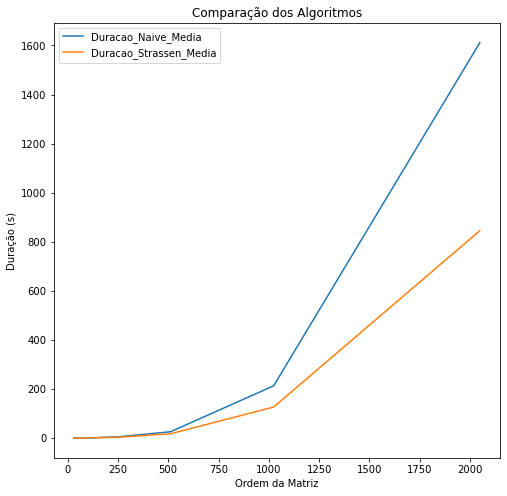

In [18]:
# Desenhando o gráfico - OUTPUT DO PROGRAMA
ax = medias.plot(x='Ordem_Matriz', title = 'Comparação dos Algoritmos', figsize = (8,8))
ax.set_xlabel("Ordem da Matriz")
ax.set_ylabel("Duração (s)")
ax.legend()